In [1]:
### define our metrics function with plotting confusion matrix
import itertools
from sklearn.metrics import confusion_matrix 

### define function for plotting confusion matrix
def plot_confusion_matrix(y_true, y_preds):
    # Print confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_preds)
    # Create the basic matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    # Add a legend
    plt.colorbar();
    plt.show();
def metrics(model_name, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Model: {model_name}', )
    print('-'*60)
    plot_confusion_matrix(y_test,y_hat_test)
    print(f'test accuracy: {round(accuracy_score(y_test, y_hat_test),2)}')
    print(f'train accuracy: {round(accuracy_score(y_train, y_hat_train),2)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n', pd.crosstab(y_test, y_hat_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
    print('\ntest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    print('\ntrain report:\n' + classification_report(y_train, y_hat_train))
    print('-'*60)

In [2]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import accuracy_score,classification_report

# Classification
from sklearn.metrics import recall_score, f1_score, fbeta_score, r2_score, roc_auc_score, roc_curve, auc, cohen_kappa_score


## To display  all the interactive output without using the print function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [4]:
import pandas as pd
df=pd.read_csv("ToddlerAutism.csv")



In [5]:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,family member,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,family member,No
9,10,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no,Health Care Professional,Yes


In [6]:
df.shape

(1054, 19)

In [7]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [8]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [9]:
#remove unwanted columns
df.drop(['Case_No', 'Who completed the test'], axis = 1, inplace = True)
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

In [10]:
# Calculating the percentage of babies shows the symptoms of autisim
yes_autism= df[df['Class/ASD Traits ']=='Yes']
no_autism= df[df['Class/ASD Traits ']=='No']

print("Toddlers:",round(len(yes_autism)/len(df) * 100,2))

print("Toddlers:",round(len(no_autism)/len(df) * 100,2))





Toddlers: 69.07
Toddlers: 30.93


In [11]:
# Displaying the content of the target column
df['Class/ASD Traits '].value_counts()

Yes    728
No     326
Name: Class/ASD Traits , dtype: int64

([<matplotlib.patches.Wedge at 0x26edddd7d90>,
 [Text(-0.9910065639807614, -0.676687512923835, 'no_autism'),
  Text(0.908422683649031, 0.620296886846849, 'yes_autism')],
 [Text(-0.5780871623221108, -0.39473438253890375, '69.1%'),
  Text(0.4955032819903805, 0.3383437564619176, '30.9%')])

(-1.1964412814503307,
 1.1171489052994765,
 -1.1740720739103871,
 1.1035272416147803)

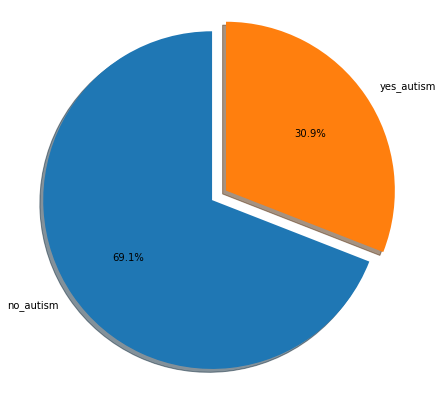

In [12]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.pie(df["Class/ASD Traits "].value_counts(),labels=('no_autism','yes_autism'),explode = [0.1,0],autopct ='%1.1f%%' ,
        shadow = True,startangle = 90,labeldistance = 1.1)
plt.axis('equal')

plt.show()

In [13]:
# Checking null data 
df.isnull().sum()

A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
Qchat-10-Score         0
Sex                    0
Ethnicity              0
Jaundice               0
Family_mem_with_ASD    0
Class/ASD Traits       0
dtype: int64

In [14]:
df.dtypes

A1                      int64
A2                      int64
A3                      int64
A4                      int64
A5                      int64
A6                      int64
A7                      int64
A8                      int64
A9                      int64
A10                     int64
Age_Mons                int64
Qchat-10-Score          int64
Sex                    object
Ethnicity              object
Jaundice               object
Family_mem_with_ASD    object
Class/ASD Traits       object
dtype: object

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

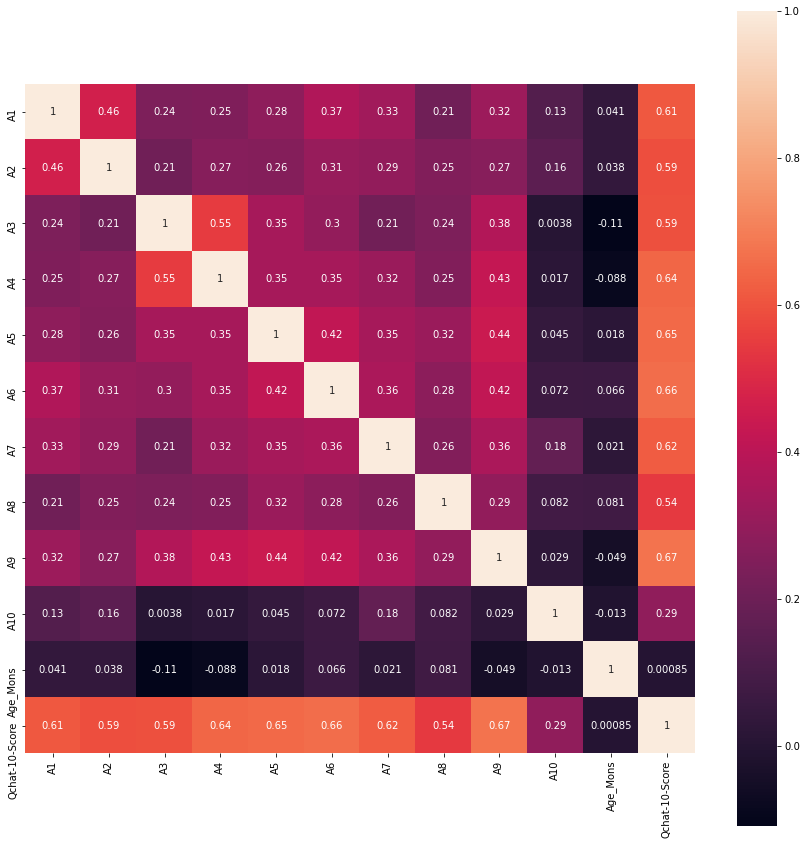

In [15]:
corr = df.corr( )
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

<Figure size 1152x576 with 0 Axes>

<AxesSubplot:xlabel='Jaundice', ylabel='count'>

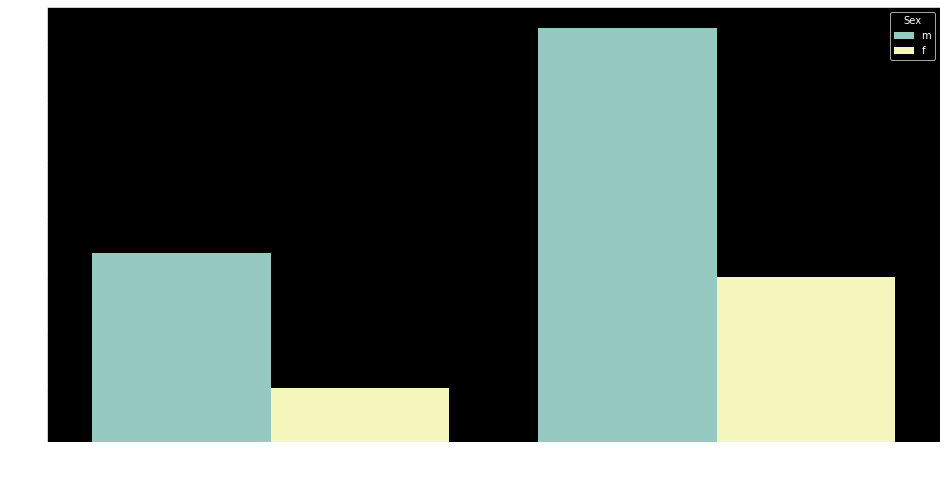

In [16]:
# Visualizing Juandice occurance in males and females
plt.figure(figsize = (16,8))

plt.style.use('dark_background')
sns.countplot(x = 'Jaundice', hue = 'Sex', data = yes_autism)

<AxesSubplot:xlabel='Qchat-10-Score', ylabel='count'>

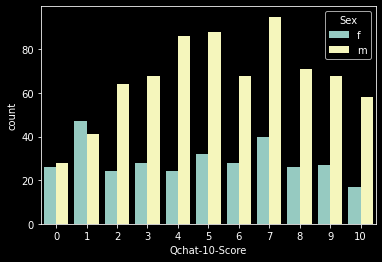

In [17]:
sns.countplot(x = 'Qchat-10-Score', hue = 'Sex', data = df)

<AxesSubplot:xlabel='Age_Mons', ylabel='count'>

Text(0.5, 0, 'Toddlers age in months')

Text(0.5, 1.0, 'Age distribution of ASD positive')

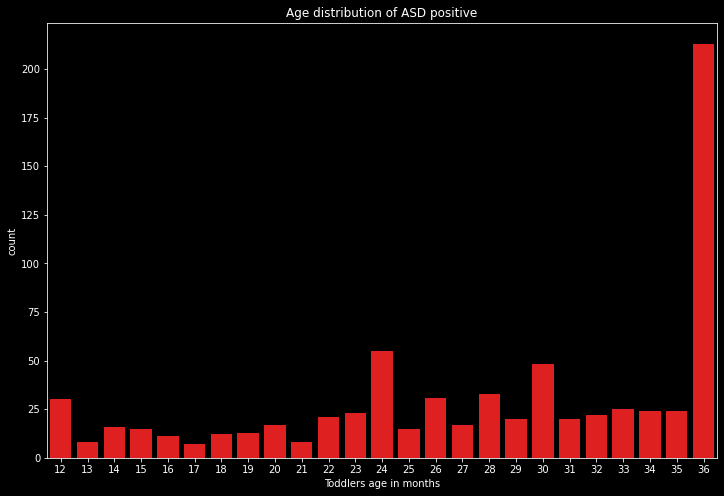

In [18]:
#Visualizing  the age distribution of Positive ASD  among Todllers


f, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x="Age_Mons", data=yes_autism, color="r");

plt.style.use('dark_background')
ax.set_xlabel('Toddlers age in months')
ax.set_title('Age distribution of ASD positive')



<Figure size 1152x576 with 0 Axes>

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

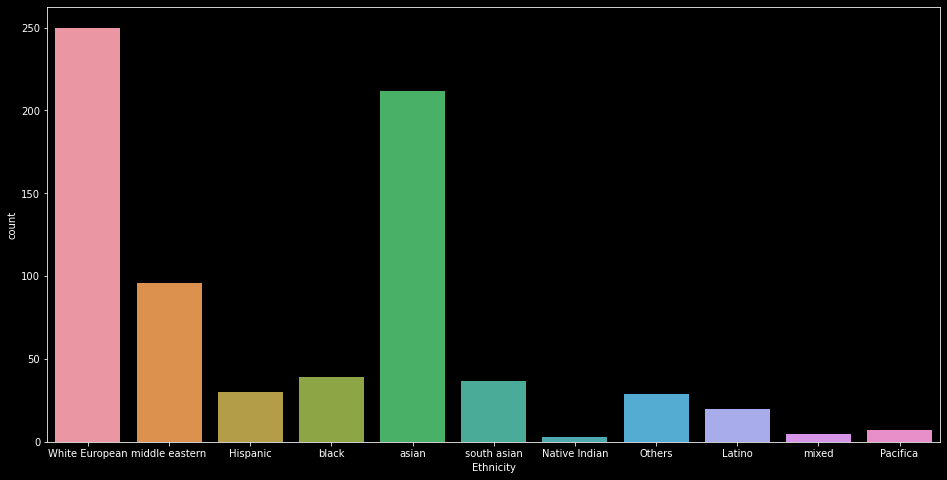

In [19]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'Ethnicity', data = yes_autism)

<Figure size 1440x432 with 0 Axes>

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

Text(0.5, 1.0, 'Ethnicity Distribution of Positive ASD among Toddlers')

Text(0.5, 0, 'Ethnicity')

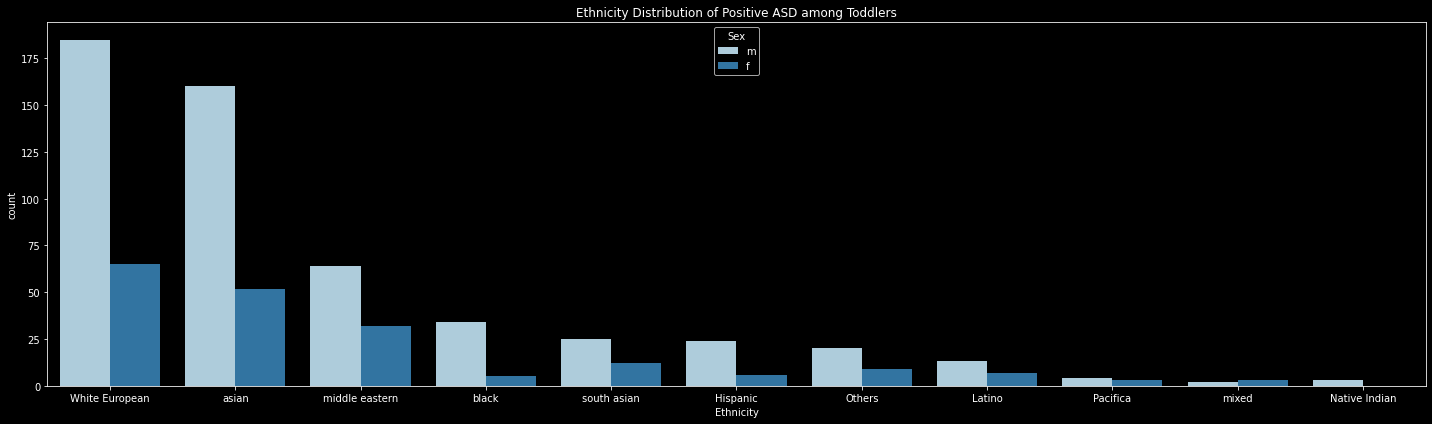

In [20]:
#  visualize positive  ASD among Toddlers based on Ethnicity
plt.figure(figsize=(20,6))
sns.countplot(x='Ethnicity',data=yes_autism,order= yes_autism['Ethnicity'].value_counts().index[:11],hue='Sex',palette='Paired')
plt.title('Ethnicity Distribution of Positive ASD among Toddlers')
plt.xlabel('Ethnicity')
plt.tight_layout()


In [21]:
# Displaying number of positive cases of Autisim with Regards Ethnicity
yes_autism['Ethnicity'].value_counts()

White European    250
asian             212
middle eastern     96
black              39
south asian        37
Hispanic           30
Others             29
Latino             20
Pacifica            7
mixed               5
Native Indian       3
Name: Ethnicity, dtype: int64

<AxesSubplot:xlabel='Family_mem_with_ASD', ylabel='count'>

Text(0.5, 1.0, 'Positive ASD Toddler relatives with Autism distribution for different ethnicities')

Text(0.5, 0, 'Toddler Relatives with ASD')

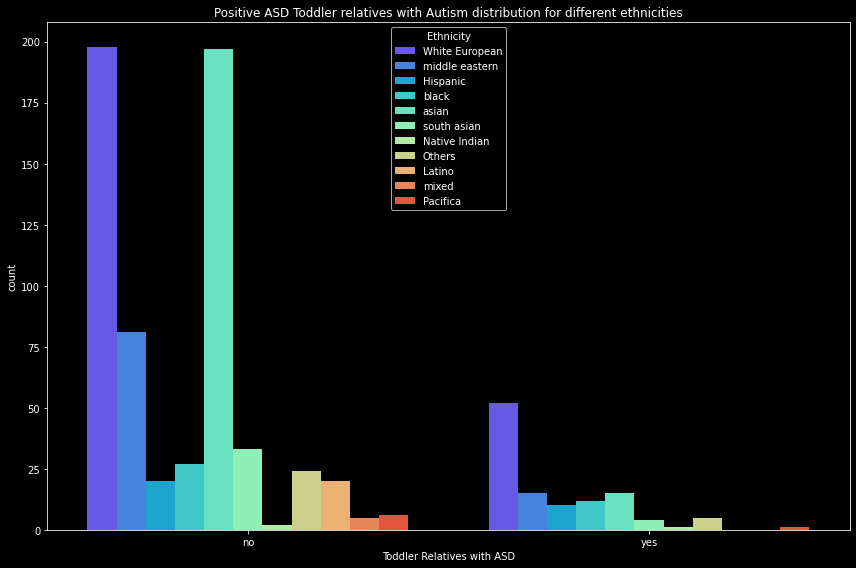

In [22]:
#Lets visualize the distribution of autism in family within different ethnicity
f, ax = plt.subplots(figsize=(12, 8))


sns.countplot(x='Family_mem_with_ASD',data=yes_autism,hue='Ethnicity',palette='rainbow',ax=ax)
ax.set_title('Positive ASD Toddler relatives with Autism distribution for different ethnicities')
ax.set_xlabel('Toddler Relatives with ASD')
plt.tight_layout()




In [23]:
# removing 'Qchat-10-Score'
df.drop('Qchat-10-Score', axis = 1, inplace = True)

In [24]:
le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'Class/ASD Traits ', 'Sex', 'Jaundice']
for col in columns:
    df[col] = le.fit_transform(df[col])
df.dtypes


A1                     int64
A2                     int64
A3                     int64
A4                     int64
A5                     int64
A6                     int64
A7                     int64
A8                     int64
A9                     int64
A10                    int64
Age_Mons               int64
Sex                    int32
Ethnicity              int32
Jaundice               int32
Family_mem_with_ASD    int32
Class/ASD Traits       int32
dtype: object

In [25]:
df.head(25)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,0,8,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,1,5,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,1,8,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,1,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,0,5,0,1,1
5,1,1,0,0,1,1,1,1,1,1,21,1,7,0,0,1
6,1,0,0,1,1,1,0,0,1,0,33,1,6,1,0,1
7,0,1,0,0,1,0,1,1,1,1,33,1,6,1,0,1
8,0,0,0,0,0,0,1,0,0,1,36,1,6,0,0,0
9,1,1,1,0,1,1,0,1,1,1,22,1,10,0,0,1


In [26]:
X = df.drop(['Class/ASD Traits '], axis = 1)
y = df['Class/ASD Traits ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state =42)
X.isnull().sum()
X.info()

A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
Sex                    0
Ethnicity              0
Jaundice               0
Family_mem_with_ASD    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   A1                   1054 non-null   int64
 1   A2                   1054 non-null   int64
 2   A3                   1054 non-null   int64
 3   A4                   1054 non-null   int64
 4   A5                   1054 non-null   int64
 5   A6                   1054 non-null   int64
 6   A7                   1054 non-null   int64
 7   A8                   1054 non-null   int64
 8   A9                   1054 non-null   int64
 9   A10                  1054 non-null   int64
 10  Age_Mons             1054 non-null   int64
 11  Sex                  1054 non-null   int32
 12  Ethnicity            1054 non-null   int32
 13  Jaundice             1054 non-null   int32
 14  Family_mem_with_ASD  1054 non-null   int32
dtypes: int32(4), int64(11)
memory usage: 107.2 KB


In [27]:


models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBClassifier()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ABR', AdaBoostRegressor()))

for name, model in models:
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test).astype(int)
    y_hat_train = model.predict(X_train).astype(int)
    print(name, 'Accuracy Score is : ', round(accuracy_score(y_test, y_hat_test)))

    #metrics(name, y_train, y_test, y_hat_train, y_hat_test)


    
    

LogisticRegression()

LR Accuracy Score is :  1


LinearDiscriminantAnalysis()

LDA Accuracy Score is :  1


KNeighborsClassifier()

KNN Accuracy Score is :  1


GaussianNB()

NB Accuracy Score is :  1


SVC()

SVM Accuracy Score is :  1


RandomForestRegressor()

RF Accuracy Score is :  1
[10:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGB Accuracy Score is :  1


GradientBoostingRegressor()

GBR Accuracy Score is :  1


AdaBoostRegressor()

ABR Accuracy Score is :  0


In [28]:
for name, model in models:
    
    y_hat_test = model.predict(X_test).astype(int)
    y_hat_train = model.predict(X_train).astype(int)
    print(name, 'Accuracy Score is : ',round( accuracy_score(y_test, y_hat_test),2))

LR Accuracy Score is :  1.0
LDA Accuracy Score is :  0.96
KNN Accuracy Score is :  0.91
NB Accuracy Score is :  0.94
SVM Accuracy Score is :  0.78
RF Accuracy Score is :  0.65
XGB Accuracy Score is :  0.99
GBR Accuracy Score is :  0.64
ABR Accuracy Score is :  0.46


In [29]:
svc = SVC()

params = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

clf = GridSearchCV(svc, param_grid = params, scoring = 'accuracy', cv = 10, verbose = 2)

clf.fit(X_train, y_train)
clf.best_params_

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma

[CV] END ....................C=0.1, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ....................C=0.8, gamma=0.9, kernel=linear; total time=   0.0s
[CV] END ....................C=0.8, gamma=0.9, kernel=linear; total time=   0.0s
[CV] END ....................C=0.8, gamma=0.9, kernel=linear; total time=   0.0s
[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .......................C=0.8, gamma=1.4, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=1.4, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=1.4, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=1.4, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=1.4, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=1.4, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=1.4, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=1.4, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=1.4, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=1.4, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .......................C=0.9, gamma=1.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.9, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .........................C=1, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.9, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.9, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.9, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.9, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.9, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.9, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.9, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .........................C=1, gamma=1.3, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=1.3, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=1.3, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=1.4, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=1.4, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=1.4, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=1.4, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=1.4, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=1.4, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=1.4, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=1.4, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=1.4, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ....................C=1.1, gamma=1.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=1.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=1.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=1.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=1.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=1.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=1.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=1.1, kernel=linear; total time=   0.0s
[CV] END .......................C=1.1, gamma=1.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=1.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=1.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=1.1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ....................C=1.2, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ....................C=1.2, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ....................C=1.2, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ....................C=1.2, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ....................C=1.2, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ....................C=1.2, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END .......................C=1.2, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.2, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.2, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.2, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.2, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.2, gamma=0.8, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ....................C=1.2, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.2, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.2, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.2, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.2, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END .......................C=1.2, gamma=1.3, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.2, gamma=1.3, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.2, gamma=1.3, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.2, gamma=1.3, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.2, gamma=1.3, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.2, gamma=1.3, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.2, gamma=1.3, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ......................C=1.3, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=1.3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=1.3, gamma=1.1, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .......................C=1.4, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=1.4, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ....................C=1.4, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ....................C=1.4, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ....................C=1.4, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .......................C=1.4, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.4, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END ....................C=1.4, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.4, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.4, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.4, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.4, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.4, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.4, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

{'C': 0.8, 'gamma': 0.1, 'kernel': 'linear'}

SVC(C=0.8, gamma=0.1, kernel='linear')

Model: SVC(C=0.8, gamma=0.1, kernel='linear')
------------------------------------------------------------


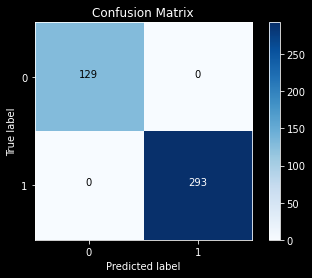

test accuracy: 1.0
train accuracy: 0.45
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.36      1.00      0.53       197
           1       1.00      0.20      0.33       435

    accuracy                           0.45       632
   macro avg       0.68      0.60      0.43       632
weigh

1.0

In [30]:
# Re-running model with best parametres
from sklearn.svm import SVC
svc1 = SVC(C = 0.8, gamma = 0.1, kernel = 'linear')
svc1.fit(X_train, y_train)
y_hat_test = svc1.predict(X_test)
#print(accuracy_score(y_test, y_hat_test))
metrics(svc1, y_train, y_test, y_hat_train, y_hat_test)
svcgrid_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

svcgrid_test_acc

In [31]:

#Instantiate the pipeline
from sklearn.pipeline import Pipeline

pipe = Pipeline([('classifier', RandomForestClassifier(random_state=123))])


In [32]:
grid = [{'classifier__criterion': ['gini', 'entropy'],
         'classifier__n_estimators':[10, 20, 50, 100],
         'classifier__max_depth': [None, 5, 3, 10],
         'classifier__min_samples_split': [1.0, 6, 10],
         'classifier__min_samples_leaf': [1,  6, 10],
         'classifier__class_weight':['balanced']}]

In [33]:
clf = GridSearchCV(estimator=pipe, param_grid=grid,
                   cv=5, scoring='roc_auc', n_jobs=-1)
clf.fit(X_train, y_train)
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid=[{'classifier__class_weight': ['balanced'],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__max_depth': [None, 5, 3, 10],
                          'classifier__min_samples_leaf': [1, 6, 10],
                          'classifier__min_samples_split': [1.0, 6, 10],
                          'classifier__n_estimators': [10, 20, 50, 100]}],
             scoring='roc_auc')

Model: GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid=[{'classifier__class_weight': ['balanced'],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__max_depth': [None, 5, 3, 10],
                          'classifier__min_samples_leaf': [1, 6, 10],
                          'classifier__min_samples_split': [1.0, 6, 10],
                          'classifier__n_estimators': [10, 20, 50, 100]}],
             scoring='roc_auc')
------------------------------------------------------------


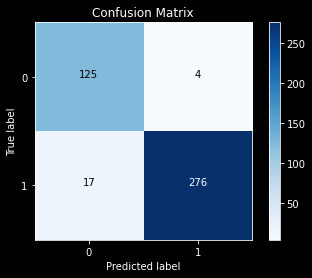

test accuracy: 0.95
train accuracy: 0.96
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          125    4  129
1           17  276  293
All        142  280  422

test report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       129
           1       0.99      0.94      0.96       293

    accuracy                           0.95       422
   macro avg       0.93      0.96      0.94       422
weighted avg       0.95      0.95      0.95       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       197
           1       1.00      0.95      0.97       435

    accuracy                           0.96       632
   macro avg       0.95      0.97      0.96       632
weig

In [34]:

metrics(clf, y_train, y_test, y_hat_train, y_hat_test)


In [35]:
print(round(clf.score(X_train, y_train)))
print(round(clf.score(X_test, y_test)))

1
1


In [36]:
clf.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__min_samples_leaf': 6,
 'classifier__min_samples_split': 6,
 'classifier__n_estimators': 100}

In [37]:
# Research best estimator from grid
best_clf_estimator = clf.best_estimator_
best_clf_estimator.fit(X_train,y_train)

Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=6, min_samples_split=6,
                                        random_state=123))])

Model: Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=6, min_samples_split=6,
                                        random_state=123))])
------------------------------------------------------------


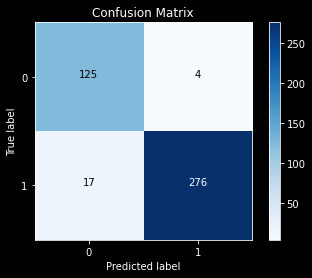

test accuracy: 0.95
train accuracy: 0.96
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          125    4  129
1           17  276  293
All        142  280  422

test report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       129
           1       0.99      0.94      0.96       293

    accuracy                           0.95       422
   macro avg       0.93      0.96      0.94       422
weighted avg       0.95      0.95      0.95       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       197
           1       1.00      0.95      0.97       435

    accuracy                           0.96       632
   macro avg       0.95      0.97      0.96       632
weig

0.95

In [38]:
#Predictions
y_hat_train=best_clf_estimator.predict(X_train)
y_hat_test = best_clf_estimator.predict(X_test)
results=metrics(best_clf_estimator, y_train, y_test, y_hat_train, y_hat_test)
rf_gridsearch_test_acc = round(accuracy_score(y_test,y_hat_test), 2)
rf_gridsearch_test_acc

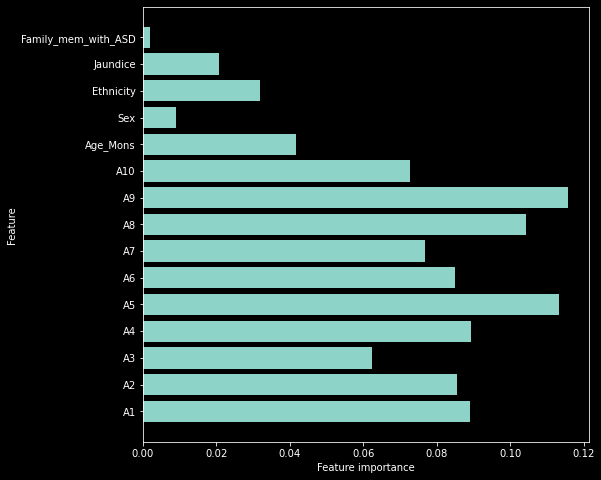

In [39]:
plot_feature_importances(model)

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 3), random_state=33,
              solver='lbfgs')

Model: MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 3), random_state=33,
              solver='lbfgs')
------------------------------------------------------------


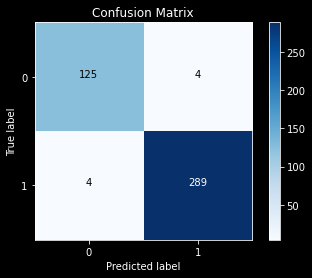

test accuracy: 0.98
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          125    4  129
1            4  289  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       129
           1       0.99      0.99      0.99       293

    accuracy                           0.98       422
   macro avg       0.98      0.98      0.98       422
weighted avg       0.98      0.98      0.98       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weigh

In [40]:
# Neural Network Classifier Using SKLearn
##Applying MLPClassifier Model 
from sklearn.neural_network import MLPClassifier
MLPClassifierModel = MLPClassifier(activation='tanh', # can be also identity , logistic , relu
                                   solver='lbfgs',  # can be also sgd , adam
                                   learning_rate='constant', # can be also invscaling , adaptive
                                   early_stopping= False,
                                   alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)
MLPClassifierModel.fit(X_train, y_train)
#Calculating Prediction
y_hat_test = MLPClassifierModel.predict(X_test)
y_hat_train = MLPClassifierModel.predict(X_train)

results=metrics(MLPClassifierModel, y_train, y_test, y_hat_train, y_hat_test)

#Calculating Accuracy Score  
nn_sklearn_test_acc = round(accuracy_score(y_test, y_hat_test, normalize=True),2)

print('Accuracy Score is : ', nn_sklearn_test_acc)


In [41]:
# Define simple neural network model
# Keras

from keras.models import Sequential
from keras.layers import *
#from keras.optimizers import  RMSprop
from tensorflow.keras.optimizers import Adam, RMSprop




model = Sequential()
# Define Input Layer wits 15 features as an input
model.add(Dense(100, input_dim=15, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
#single output layer with one neuron since we only want to predict two classes either yes autisim =1 or no autisim=zero
model.add(Dense(activation = 'sigmoid', units = 1))


# Compile the Neural network
model.compile(loss='binary_crossentropy', # we use binarray here becuase we just have 2 classes
             optimizer = Adam(lr=0.0001, decay=1e-5), ### learning rate 0.0001
              metrics=['acc'])
# Fit to training data
model.fit(X_train, y_train, epochs=100,  
          validation_data=(X_test, y_test))

Epoch 1/100
20/20 [==============================] - 2s 29ms/step - loss: 1.7829 - acc: 0.6883 - val_loss: 1.6099 - val_acc: 0.6943
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 1.5570 - acc: 0.6883 - val_loss: 1.4005 - val_acc: 0.6943
Epoch 3/100
20/20 [==============================] - 0s 9ms/step - loss: 1.3404 - acc: 0.6899 - val_loss: 1.1981 - val_acc: 0.6991
Epoch 4/100
20/20 [==============================] - 0s 9ms/step - loss: 1.1403 - acc: 0.6930 - val_loss: 1.0080 - val_acc: 0.7014
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 0.9545 - acc: 0.7025 - val_loss: 0.8529 - val_acc: 0.7227
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.8063 - acc: 0.7120 - val_loss: 0.7291 - val_acc: 0.7322
Epoch 7/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6975 - acc: 0.7041 - val_loss: 0.6439 - val_acc: 0.7251
Epoch 8/100
20/20 [==============================] - 0s 9ms/step - loss: 0.6264 

Epoch 63/100
20/20 [==============================] - 0s 9ms/step - loss: 0.1836 - acc: 0.9699 - val_loss: 0.1833 - val_acc: 0.9431
Epoch 64/100
20/20 [==============================] - 0s 10ms/step - loss: 0.1821 - acc: 0.9699 - val_loss: 0.1815 - val_acc: 0.9479
Epoch 65/100
20/20 [==============================] - 0s 9ms/step - loss: 0.1802 - acc: 0.9715 - val_loss: 0.1799 - val_acc: 0.9455
Epoch 66/100
20/20 [==============================] - 0s 8ms/step - loss: 0.1785 - acc: 0.9684 - val_loss: 0.1783 - val_acc: 0.9479
Epoch 67/100
20/20 [==============================] - 0s 9ms/step - loss: 0.1770 - acc: 0.9699 - val_loss: 0.1768 - val_acc: 0.9455
Epoch 68/100
20/20 [==============================] - 0s 9ms/step - loss: 0.1750 - acc: 0.9684 - val_loss: 0.1752 - val_acc: 0.9479
Epoch 69/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1737 - acc: 0.9684 - val_loss: 0.1738 - val_acc: 0.9455
Epoch 70/100
20/20 [==============================] - 0s 9ms/step - loss: 

In [42]:
# collecting the summary of our neural network paramters
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1600      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________


In [43]:
#structure of keras neuralnetwork model
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
plot_model(model)
# looking at the structure of my neural network

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [44]:
def evaluate_clf(y_true, y_pred):
    """Return confusion matrix, classification report, and accuracy score
    for a classifier.
    
    Parameters
    ----------
    y_true : array-like
        Target class labels
    y_pred : array-like
        Predicted class labels
        
    Returns
    ----------
    Confusion matrix, classification report, accuracy score
    """
    
    test_acc = round(accuracy_score(y_true, y_pred), 2)
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('---'*20)
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('---'*20)
    print("kerasNN_test_acc:",round(accuracy_score(y_test,y_hat_test), 2))
    print("kerasNN_train_acc:" ,round(accuracy_score(y_train,y_hat_train), 2))


In [45]:
#Predictions

predict_x=model.predict(X_test)
y_hat_test=np.argmax(predict_x,axis=1)

predict_y=model.predict(X_train)
y_hat_train=np.argmax(predict_y,axis=1)

'''y_hat_test = model.predict_classes(X_test)
y_hat_train = model.predict_classes(X_train)'''
# applying the metrics function
evaluate_clf(y_test, y_hat_test)




'y_hat_test = model.predict_classes(X_test)\ny_hat_train = model.predict_classes(X_train)'

Confusion Matrix:
[[129   0]
 [293   0]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.31      1.00      0.47       129
           1       0.00      0.00      0.00       293

    accuracy                           0.31       422
   macro avg       0.15      0.50      0.23       422
weighted avg       0.09      0.31      0.14       422

------------------------------------------------------------
kerasNN_test_acc: 0.31
kerasNN_train_acc: 0.31


In [46]:
# Create classifier summary table

LogisticRegression_Accuracy =  1.0
LinearDiscriminantAnalysis_accuracy  =  0.96
KNeighborsClassifier_accuracy =  0.91
DecisionTreeClassifier_accuracy =  0.91
GaussianNB_accuracy =  0.94
SVC_beforegrid_accuracy =  0.78
RandomForest_beforegrid_accuracy =  0.64
XGBClassifier_accuracy=  0.99
GradientBoosting_accuracy =  0.64,
AdaBoosting_accuracy = 0.49
SVC_aftergrid_accuracy = 1.0
RandomForest_aftergrid_accuracy =0.96
Neuralnetwork_SKLearn_accuracy= 0.99
Neuralnetwork_Keras_accuracy = 0.95



models=['LogisticRegression','LinearDiscriminantAnalysis',
       'KNeighborsClassifier','DecisionTreeClassifier',
        'GaussianNB','SVC_beforegrid',
        'RandomForest_beforegrid','XGBClassifier',
        'GradientBoosting','AdaBoosting','SVC_aftergrid','RandomForest_aftergrid','Neuralnetwork_SKLearn Accuracy','Neuralnetwork_Keras']


test_Accuracy=[1.0,0.96,0.91,0.91,0.94, 0.78,0.64, 0.99,0.64,0.49,1.0,0.96,0.99,0.95]




accuracy_summary = pd.DataFrame([models, test_Accuracy]).T
accuracy_summary.columns = ['Classifier', 'test_Accuracy']


In [47]:
accuracy_summary

,Classifier,test_Accuracy
0,LogisticRegression,1.0
1,LinearDiscriminantAnalysis,0.96
2,KNeighborsClassifier,0.91
3,DecisionTreeClassifier,0.91
4,GaussianNB,0.94
5,SVC_beforegrid,0.78
6,RandomForest_beforegrid,0.64
7,XGBClassifier,0.99
8,GradientBoosting,0.64
9,AdaBoosting,0.49


In [48]:
import pickle

# Save trained model to file
pickle.dump(best_clf_estimator, open("autism.pkl", "wb"))

In [49]:
loaded_model = pickle.load(open("autism.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,

0.9502369668246445

In [50]:
X_test.head(1)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
260,1,1,1,0,0,1,1,0,1,1,33,0,9,0,0


In [55]:
'''import tensorflow as tf
from tensorflow import keras
from tensorflow import lite
tf.keras.models.save_model(model,'model.pbtxt')
converter=tf.lite.TFLiteConverter.from_keras_model(model=model)
model_tflite=converter.convert()
open("ot.tflite","wb").write(model_tflite)
print("hello")'''

INFO:tensorflow:Assets written to: model.pbtxt\assets
INFO:tensorflow:Assets written to: C:\Users\Sujith\AppData\Local\Temp\tmpuafl4n0c\assets


8248

hello


In [51]:

A1 = input()
A2 = input()
A3 = input()
A4 = input()
A5 = input()
A6 = input()
A7 = input()
A8 = input()
A9 = input()
A10 = input()
Age_Mons = input()
Sex = input()
Ethnicity = input()
Jaundice = input()
Family_mem_with_ASD = input()


KeyboardInterrupt: Interrupted by user

In [ ]:
'''import tensorflow as tf
from tensorflow import keras
from tensorflow import lite
kearas_file="linear.h5"
tf.keras.models.save_model(model,kearas_file)'''

In [ ]:
'''converter = lite.TFLiteConverter.from_save_model(model)

tfmodel=converter.convert()
open("linear.tflite","wb").write(tfmodel)
print("hai")'''

In [ ]:
row_df = pd.DataFrame([pd.Series([A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD])])

In [ ]:
row_df


In [ ]:
prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you having austim is {prob}")

In [ ]:
r=loaded_model.predict(row_df)[0]
if r==1:
    print("Victim having austim spectram disorder")
else:
    print("Victim is not effected with austim spectram disorder")